In [2]:
import numpy as np
import matplotlib.pyplot as plt
import OutputInterface as oi
import sperhical_expansion as se
from scipy.signal import find_peaks

# Matplotlib asthetics
major = 7.5
minor = 5
width = 1.25
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
plt.rc("axes", labelsize=16) # 18
plt.rc("xtick", labelsize=14, top=True, direction="in")
plt.rc("ytick", labelsize=14, right=True, direction="in")
plt.rc("axes", titlesize=18)
plt.rc("legend", fontsize=14)
plt.rcParams['font.family'] = "serif"
plt.rcParams['axes.linewidth'] = width
plt.rcParams['xtick.minor.width'] = width
plt.rcParams['xtick.major.width'] = width
plt.rcParams['ytick.minor.width'] = width
plt.rcParams['ytick.major.width'] = width
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = major
plt.rcParams['ytick.minor.size'] = minor

## Get the orbitals from the GAMESS output file

In [3]:
filename = 'output_files/CHBrClF1.out'
output = oi.OutputInterface(filename)
coeffs = output.output_GTOs(output.HOMO)

## Laplace expansion of the wave function:
The Laplace expansion is
$$\psi_0(\mathbf{r})=\sum_{\ell=0}^{\ell_\text{max}}\sum_{m=-\ell}^{\ell}f_{\ell m}(r)Y_\ell^m(\vartheta,\varphi), \qquad f_{\ell m} = \langle Y_\ell^m | \psi_0\rangle$$
 What we need to find are the $c_{\ell m}$-coefficients for the asmptotic Coulomb wave function
 $$\psi_\text{as}(\mathbf{r})=r^{^\frac{1}{\kappa}-1}\text{e}^{-\kappa r} \sum_{\ell=0}^{\ell_\text{max}}\sum_{m=-\ell}^{\ell}c_{\ell m}Y_\ell^m(\vartheta,\varphi)$$

In [4]:
Ip = -output.saved_orbitals[output.HOMO][0]
kappa = np.sqrt(2*Ip)

n_r = 50
r_lst = np.linspace(1, 17, n_r)
flms = []
for i, r in enumerate(r_lst):
    print(f'Evaluating at r={r:.4f} \t Nr. {i+1}/{n_r}')
    flms.append(se.spherical_expansion(lambda theta, phi: output.eval_orbital_spherical(r, theta, phi), 30))

Evaluating at r=1.0000 	 Nr. 1/50
Evaluating at r=1.3265 	 Nr. 2/50
Evaluating at r=1.6531 	 Nr. 3/50
Evaluating at r=1.9796 	 Nr. 4/50
Evaluating at r=2.3061 	 Nr. 5/50
Evaluating at r=2.6327 	 Nr. 6/50
Evaluating at r=2.9592 	 Nr. 7/50
Evaluating at r=3.2857 	 Nr. 8/50
Evaluating at r=3.6122 	 Nr. 9/50
Evaluating at r=3.9388 	 Nr. 10/50
Evaluating at r=4.2653 	 Nr. 11/50
Evaluating at r=4.5918 	 Nr. 12/50
Evaluating at r=4.9184 	 Nr. 13/50
Evaluating at r=5.2449 	 Nr. 14/50
Evaluating at r=5.5714 	 Nr. 15/50
Evaluating at r=5.8980 	 Nr. 16/50
Evaluating at r=6.2245 	 Nr. 17/50
Evaluating at r=6.5510 	 Nr. 18/50
Evaluating at r=6.8776 	 Nr. 19/50
Evaluating at r=7.2041 	 Nr. 20/50
Evaluating at r=7.5306 	 Nr. 21/50
Evaluating at r=7.8571 	 Nr. 22/50
Evaluating at r=8.1837 	 Nr. 23/50
Evaluating at r=8.5102 	 Nr. 24/50
Evaluating at r=8.8367 	 Nr. 25/50
Evaluating at r=9.1633 	 Nr. 26/50
Evaluating at r=9.4898 	 Nr. 27/50
Evaluating at r=9.8163 	 Nr. 28/50
Evaluating at r=10.1429 	 Nr.

Lets plot it!

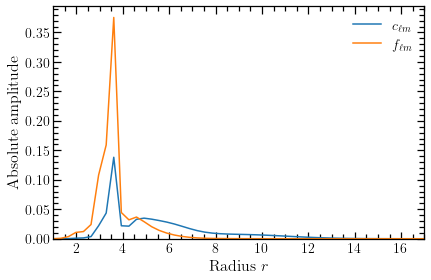

In [14]:
plt.figure(facecolor='white')

def radial(r, kappa):
    return r**(1/kappa - 1) * np.exp(-kappa*r)

sgn, l, m = 1, 9, 1#1, 5, 4
#plt.plot(r_lst, np.array([output.eval_orbital_spherical(r, np.pi/2, 0) for r in r_lst])*100, label=r'$\psi_0$')
plt.plot(r_lst, np.abs(np.array(flms)[:, sgn, l, m])/radial(r_lst, kappa), label=r'$c_{\ell m}$')
plt.plot(r_lst, np.abs(np.array(flms)[:, sgn, l, m])*70, label=r'$f_{\ell m}$')
plt.legend(frameon=False)
plt.xlabel(r'Radius $r$')
plt.ylabel(r'Absolute amplitude')
plt.minorticks_on()
plt.xlim(r_lst[0], r_lst[-1])
plt.ylim(bottom=0)
plt.tight_layout()

## Now we'll find the optimal radius $r^\star_{\ell m}$ for each $\ell$ and $m$
This is done by finding the places where $\frac{\text{d}c_{\ell m}}{\text{d}r}=0$ in the above, there are multiple

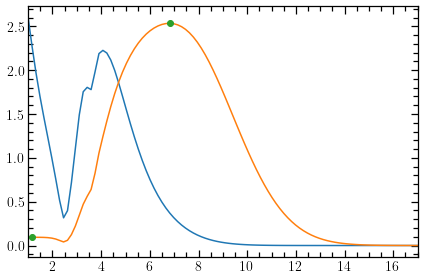

In [83]:
plt.figure(facecolor='white')

clm = np.abs(np.array(flms)[:, sgn, l, m])/radial(r_lst, kappa)
plt.plot(r_lst, np.abs(np.array(flms)[:, sgn, l, m])*70, label=r'$f_{\ell m}$')
clm_deriv = np.gradient(clm)
plt.plot(r_lst, clm)

idx = find_peaks(clm)[0]
plt.plot(r_lst[idx], clm[idx], 'o')

plt.minorticks_on()
plt.minorticks_on()
plt.xlim(r_lst[0], r_lst[-1])
plt.tight_layout()

In [90]:
arr = np.array([1]*10)
arr[find_peaks(arr)[0][0]]
if find_peaks(arr)[0].size > 0:
    print('joe')

IndexError: index 0 is out of bounds for axis 0 with size 0

Evaluating at r=1.0000 	 Nr. 1/30
Evaluating at r=1.6552 	 Nr. 2/30
Evaluating at r=2.3103 	 Nr. 3/30
Evaluating at r=2.9655 	 Nr. 4/30
Evaluating at r=3.6207 	 Nr. 5/30
Evaluating at r=4.2759 	 Nr. 6/30
Evaluating at r=4.9310 	 Nr. 7/30
Evaluating at r=5.5862 	 Nr. 8/30
Evaluating at r=6.2414 	 Nr. 9/30
Evaluating at r=6.8966 	 Nr. 10/30
Evaluating at r=7.5517 	 Nr. 11/30
Evaluating at r=8.2069 	 Nr. 12/30
Evaluating at r=8.8621 	 Nr. 13/30
Evaluating at r=9.5172 	 Nr. 14/30
Evaluating at r=10.1724 	 Nr. 15/30
Evaluating at r=10.8276 	 Nr. 16/30
Evaluating at r=11.4828 	 Nr. 17/30
Evaluating at r=12.1379 	 Nr. 18/30
Evaluating at r=12.7931 	 Nr. 19/30
Evaluating at r=13.4483 	 Nr. 20/30
Evaluating at r=14.1034 	 Nr. 21/30
Evaluating at r=14.7586 	 Nr. 22/30
Evaluating at r=15.4138 	 Nr. 23/30
Evaluating at r=16.0690 	 Nr. 24/30
Evaluating at r=16.7241 	 Nr. 25/30
Evaluating at r=17.3793 	 Nr. 26/30
Evaluating at r=18.0345 	 Nr. 27/30
Evaluating at r=18.6897 	 Nr. 28/30
Evaluating at r

/home/emil/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


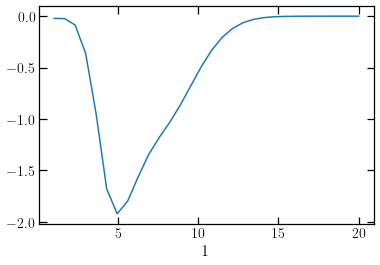

/home/emil/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


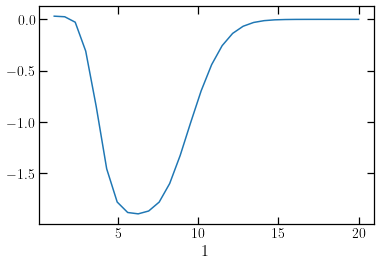

/home/emil/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


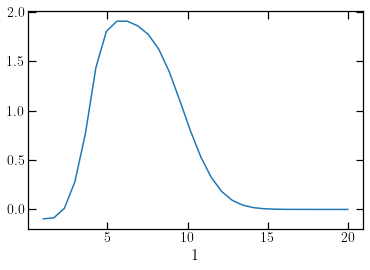

/home/emil/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


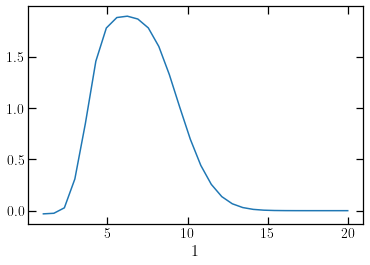

In [6]:
as_coeff = se.get_asymptotic_coeffs(output.eval_orbital_spherical, 30, 6, Ip, plot=True)

The last point seems like the one to use

In [12]:
#plt.imshow(np.abs(as_coeff[0]), norm=plt.LogN)
as_coeff[0]

array([[0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        ],
       [1.90668156+0.j        , 1.86702525-1.10862198j,
        0.        +0.j        ],
       [0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        ]])